<center>

# RFM Analysis

</center>

## 1. Environment Setup

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)

## 2. Data Loading

In [51]:
orders = pd.read_csv("../data/raw/olist_orders_dataset.csv")
order_items = pd.read_csv("../data/raw/olist_order_items_dataset.csv")
customers = pd.read_csv("../data/raw/olist_customers_dataset.csv")
products = pd.read_csv("../data/raw/olist_products_dataset.csv")

## 3. Data Preparation

#### 3.1 Timestamp Conversion

In [52]:
orders["order_purchase_timestamp"] = pd.to_datetime(
    orders["order_purchase_timestamp"]
)

orders["order_purchase_timestamp"].dtype

dtype('<M8[us]')

#### 3.2 Delivered Orders Filter

In [53]:
orders = orders[orders["order_status"] == "delivered"]

orders["order_status"].value_counts()

order_status
delivered    96478
Name: count, dtype: int64

#### 3.3 Revenue Calculating

In [54]:
order_items["revenue"] = (
    order_items["price"] + order_items["freight_value"]
)

order_items[["price", "freight_value", "revenue"]].head()

,price,freight_value,revenue
0,58.90,13.29,72.19
1,239.90,19.93,259.83
2,199.00,17.87,216.87
3,12.99,12.79,25.78
4,199.90,18.14,218.04


#### 3.4 Merge

In [55]:
df = (
    orders
    .merge(order_items, on="order_id", how="left")
    .merge(customers[["customer_id", "customer_unique_id"]],
           on="customer_id",
           how="left")
)

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,179.12,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,72.20,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,28.62,72632f0f9dd73dfee390c9b22eb56dd6


#### 3.5 Last Check

In [56]:
df[[
    "customer_unique_id",
    "order_id",
    "order_purchase_timestamp",
    "revenue"
]].head()

,customer_unique_id,order_id,order_purchase_timestamp,revenue
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,38.71
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,141.46
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,179.12
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,72.20
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,28.62


## 4. Reference Date 

In [57]:
reference_date = df["order_purchase_timestamp"].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2018-08-30 15:00:37')

## 5. Create RFM Table

In [58]:
rfm = (
    df.groupby("customer_unique_id")
      .agg({
          "order_purchase_timestamp": lambda x: (reference_date - x.max()).days,
          "order_id": "nunique",
          "revenue": "sum"
      })
      .reset_index()
)

rfm.columns = ["customer_unique_id", "Recency", "Frequency", "Monetary"]

rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


## 6. RFM Distribution Analysis

In [59]:
rfm.describe()

,Recency,Frequency,Monetary
count,93358.00,93358.00,93358.00
mean,237.94,1.03,165.17
std,152.59,0.21,226.29
min,1.00,1.00,9.59
25%,114.00,1.00,63.01
50%,219.00,1.00,107.78
75%,346.00,1.00,182.51
max,714.00,15.00,13664.08


## 7. RFM Scoring

#### 7.1 Recency Score

Lower recency is better.
Therefore, lower values receive higher scores.

In [60]:
rfm["R_score"] = pd.qcut(
    rfm["Recency"],
    5,
    labels=[5,4,3,2,1]
)

#### 7.2 Frequency Score

Higher purchase frequency is better.
Customers with more orders receive higher scores.

In [61]:
rfm["F_score"] = pd.qcut(
    rfm["Frequency"].rank(method="first"),
    5,
    labels=[1,2,3,4,5]
)

#### 7.3 Monetary Score

Customers who spend more receive higher scores.

In [62]:
rfm["M_score"] = pd.qcut(
    rfm["Monetary"],
    5,
    labels=[1,2,3,4,5]
)

## 8. RFM Final Score

We combine the three scores into a single RFM score.

In [63]:
rfm["RFM_Score"] = (
    rfm["R_score"].astype(str) +
    rfm["F_score"].astype(str) +
    rfm["M_score"].astype(str)
)

rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214


## 9. Customer Segmentation

We assign customers into basic behavioral segments based on their R and F scores

In [64]:
def segment_customer(row):
    if row["R_score"] >= 4 and row["F_score"] >= 4:
        return "Loyal Customers"
    elif row["R_score"] >= 4 and row["F_score"] <= 2:
        return "New Customers"
    elif row["R_score"] <= 2 and row["F_score"] >= 4:
        return "At Risk"
    else:
        return "Regular Customers"

rfm["Segment"] = rfm.apply(segment_customer, axis=1)

rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,4,414,New Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411,New Customers
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112,Regular Customers
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211,Regular Customers
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214,Regular Customers


## 10. Segment Distribution Summary

We analyze how customers are distributed across segments and examine average spending.

In [65]:
segment_summary = (
    rfm.groupby("Segment")
       .agg({
           "customer_unique_id": "count",
           "Monetary": "mean"
       })
       .reset_index()
)

segment_summary

,Segment,customer_unique_id,Monetary
0,At Risk,14803,169.64
1,Loyal Customers,14961,176.94
2,New Customers,14984,163.42
3,Regular Customers,48610,160.72


## 11. Segment Distribution Visualization

We visualize the number of customers in each segment

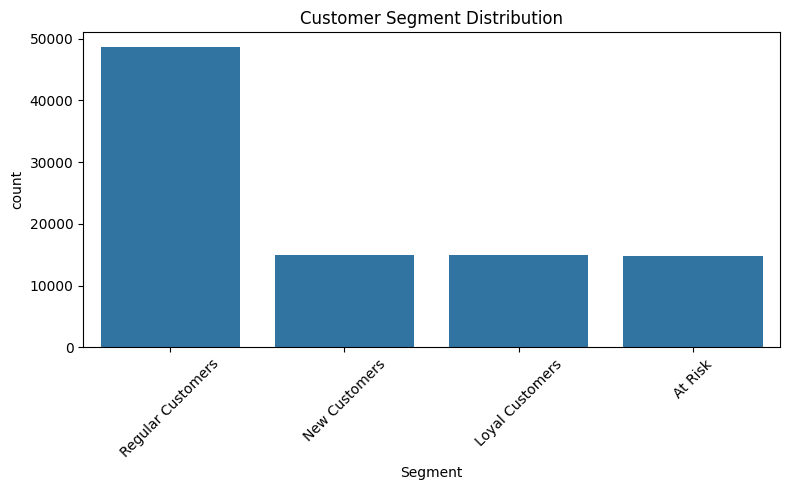

In [67]:
plt.figure(figsize=(8,5))

sns.countplot(
    data=rfm,
    x="Segment",
    order=rfm["Segment"].value_counts().index
)

plt.xticks(rotation=45)
plt.title("Customer Segment Distribution")
plt.tight_layout()

plt.show()

## 12. Segment Revenue Contribution

We analyze total revenue contribution by segment

In [68]:
segment_revenue = (
    rfm.groupby("Segment")["Monetary"]
       .sum()
       .reset_index()
       .sort_values(by="Monetary", ascending=False)
)

segment_revenue["Revenue_Share_%"] = (
    segment_revenue["Monetary"] /
    segment_revenue["Monetary"].sum() * 100
)

segment_revenue

,Segment,Monetary,Revenue_Share_%
3,Regular Customers,7812608.86,50.67
1,Loyal Customers,2647246.07,17.17
0,At Risk,2511224.39,16.29
2,New Customers,2448694.43,15.88


## 13. Final Summary

This analysis applied RFM (Recency, Frequency, Monetary) methodology to segment customers based on purchasing behavior.

Key findings:

- The majority of customers purchase only once, indicating low repeat behavior.
- A small percentage of customers generate a disproportionately high share of revenue.
- Loyal customers contribute significantly higher average monetary value.
- At-risk customers represent an opportunity for targeted retention campaigns.

From a business perspective, this segmentation enables:

- Personalized marketing strategies
- Customer retention optimization
- Targeted promotions
- Revenue growth planning

This project demonstrates practical customer analytics and segmentation skills suitable for Business Intelligence and Data Analyst roles.